## ref : https://medium.com/@thlee33/%ED%97%B7%EA%B0%88%EB%A6%AC%EB%8A%94-%EC%A2%8C%ED%91%9C%EA%B3%84-155b4ed1aae

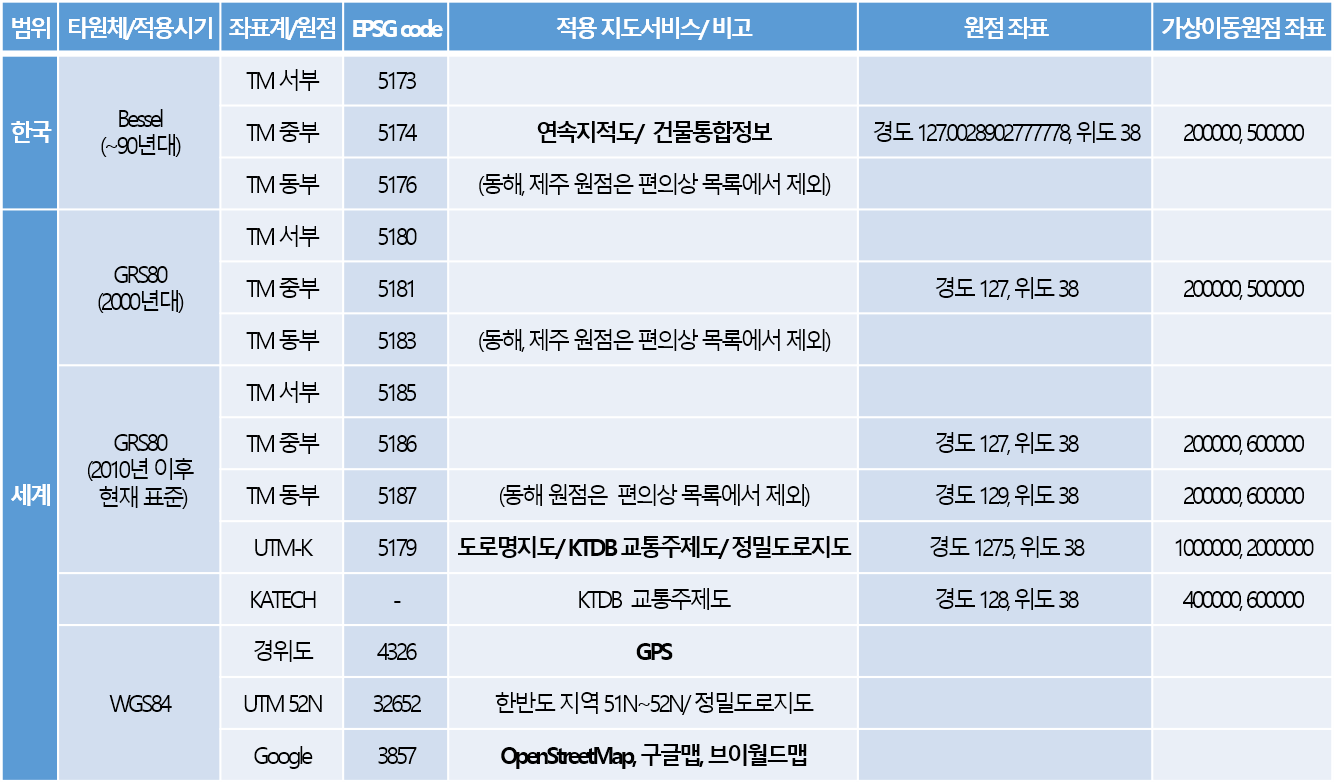

### Folium
https://python-visualization.github.io/folium/quickstart.html#Getting-Started
https://dailyheumsi.tistory.com/m/144

In [39]:
import pandas as pd
import numpy as np
import os

from folium.features import DivIcon
import folium
import pyproj
from pyproj import Proj, transform

import warnings
warnings.filterwarnings(action='ignore')

In [40]:
def katec_to_wgs84(x, y):
    inProj  = Proj('+proj=tmerc +lat_0=38 +lon_0=128 +k=0.9999 +x_0=400000 +y_0=600000 +ellps=bessel +units=m +no_defs +towgs84=-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43')
    outProj = Proj({ 'proj':'latlong', 'datum':'WGS84', 'ellps':'WGS84' })
    return transform( inProj, outProj, x, y )

In [37]:
datadf = pd.read_csv ('02.dataset.csv', encoding = 'euc-kr')

In [38]:
datadf.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,BCYC_ACDNT_OCRN_CNT,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT
0,378508,378475,508475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378509,378475,509475,2021-01-01,0.00,0.00,0.4,0.00,0.27,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378510,378475,510475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,378511,378475,511475,2021-01-01,0.08,0.08,0.2,0.39,0.16,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,378512,378475,512475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
datadf.shape

(302168, 65)

In [6]:
datadf.columns

Index(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS', 'OCRN_YMD', 'M00', 'M10',
       'M15', 'M20', 'M25', 'M30', 'M35', 'M40', 'M45', 'M50', 'M55', 'M60',
       'M65', 'M70', 'F00', 'F10', 'F15', 'F20', 'F25', 'F30', 'F35', 'F40',
       'F45', 'F50', 'F55', 'F60', 'F65', 'F70', 'DONG_CD', 'DONG_NM',
       'HGTPOJ_ACDNT_OCRN_CNT', 'PNTRINJ_OCRN_CNT', 'MCHN_ACDNT_OCRN_CNT',
       'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT', 'ACDNT_INJ_OCRN_CNT',
       'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT', 'HRFAF_OCRN_CNT',
       'AGRCMCHN_ACDNT_OCRN_CNT', 'DRKNSTAT_OCRN_CNT',
       'ANML_INSCT_ACDNT_OCRN_CNT', 'FLPS_ACDNT_OCRN_CNT', 'UNKNWN_OCRN_CNT',
       'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT', 'MTRCYC_ACDNT_OCRN_CNT',
       'THML_DAMG_OCRN_CNT', 'DRV_ACDNT_OCRN_CNT', 'DRWNG_OCRN_CNT',
       'PRGNTW_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT', 'ELTRC_ACDNT_OCRN_CNT',
       'POSNG_OCRN_CNT', 'ASPHYXIA_OCRN_CNT', 'FALLING_OCRN_CNT',
       'FLAME_OCRN_CNT', 'CHMC_SBSTNC_ACDNT_OCRN_CNT', 'WETHR_ACDNT_

In [7]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302168 entries, 0 to 302167
Data columns (total 65 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GRID_ID                     302168 non-null  int64  
 1   GRID_X_AXIS                 302168 non-null  int64  
 2   GRID_Y_AXIS                 302168 non-null  int64  
 3   OCRN_YMD                    302168 non-null  object 
 4   M00                         302168 non-null  float64
 5   M10                         302168 non-null  float64
 6   M15                         302168 non-null  float64
 7   M20                         302168 non-null  float64
 8   M25                         302168 non-null  float64
 9   M30                         302168 non-null  float64
 10  M35                         302168 non-null  float64
 11  M40                         302168 non-null  float64
 12  M45                         302168 non-null  float64
 13  M50           

In [41]:
datadf['TOTAL_CNT'] = datadf.loc[:,'HGTPOJ_ACDNT_OCRN_CNT':'BURN_OCRN_CNT'].sum()

In [42]:
datadf.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT,TOTAL_CNT
0,378508,378475,508475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,378509,378475,509475,2021-01-01,0.00,0.00,0.4,0.00,0.27,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,378510,378475,510475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,378511,378475,511475,2021-01-01,0.08,0.08,0.2,0.39,0.16,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,378512,378475,512475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [43]:
datadf['TOTAL_CNT'] = datadf.loc[:,'HGTPOJ_ACDNT_OCRN_CNT':'BURN_OCRN_CNT'].sum(axis=1)

In [19]:
datadf.head()

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,OCRN_YMD,M00,M10,M15,M20,M25,M30,...,ELTRC_ACDNT_OCRN_CNT,POSNG_OCRN_CNT,ASPHYXIA_OCRN_CNT,FALLING_OCRN_CNT,FLAME_OCRN_CNT,CHMC_SBSTNC_ACDNT_OCRN_CNT,WETHR_ACDNT_OCRN_CNT,SXAL_ASALT_OCRN_CNT,BURN_OCRN_CNT,TOTAL_CNT
0,378508,378475,508475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,378509,378475,509475,2021-01-01,0.00,0.00,0.4,0.00,0.27,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,378510,378475,510475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,378511,378475,511475,2021-01-01,0.08,0.08,0.2,0.39,0.16,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,378512,378475,512475,2021-01-01,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df1 = datadf[['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS','TOTAL_CNT']].groupby(['GRID_ID', 'GRID_X_AXIS', 'GRID_Y_AXIS']).sum().reset_index()
df1

,GRID_ID,GRID_X_AXIS,GRID_Y_AXIS,TOTAL_CNT
0,378508,378475,508475,0.0
1,378509,378475,509475,0.0
2,378510,378475,510475,0.0
3,378511,378475,511475,0.0
4,378512,378475,512475,0.0
...,...,...,...,...
851,417521,417475,521475,0.0
852,418517,418475,517475,0.0
853,418518,418475,518475,0.0
854,418519,418475,519475,0.0


In [45]:
df1.TOTAL_CNT.sum()

2827.0

In [22]:
df1.TOTAL_CNT.value_counts()

0.0      616
1.0       74
2.0       36
3.0       23
4.0       16
8.0        9
5.0        9
6.0        6
7.0        5
12.0       5
10.0       5
20.0       3
22.0       3
76.0       2
72.0       2
11.0       2
37.0       2
16.0       2
13.0       2
15.0       2
36.0       2
9.0        2
17.0       2
14.0       2
29.0       2
18.0       2
21.0       2
25.0       1
79.0       1
31.0       1
68.0       1
74.0       1
96.0       1
66.0       1
88.0       1
148.0      1
46.0       1
99.0       1
61.0       1
50.0       1
67.0       1
93.0       1
56.0       1
107.0      1
102.0      1
Name: TOTAL_CNT, dtype: int64

In [46]:
df1.TOTAL_CNT.describe()

count    856.000000
mean       3.302570
std       13.113389
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      148.000000
Name: TOTAL_CNT, dtype: float64

In [47]:
def f_color(x):
    if x > 80:       # 빨강색
        a = '#FF4F00'     
    elif x > 30:     # 주황색   
        a = '#FCB100' 
    elif x > 10:     # 5건이상 노란색
        a = '#E0F500' 
    elif x > 1:      # 1건이상 연두색
        a = '#8CF700'  
    else:            # 0건  회색
        a = '#C6C6C6'
    return a

In [48]:
df1['cell_color']= df1['TOTAL_CNT'].apply(lambda x : f_color(x))
geodf = df1.rename(columns = {'GRID_ID' : 'id','GRID_X_AXIS':'x', 'GRID_Y_AXIS':'y', 'TOTAL_CNT':'total'})
geodf = geodf[['id','x','y','cell_color','total']]

In [50]:
cell_size = 1000
a = cell_size//2
geodf['nwx'], geodf['nwy'] = geodf['x']-a, geodf['y']+a
geodf['nex'], geodf['ney'] = geodf['x']+a, geodf['y']+a
geodf['swx'], geodf['swy'] = geodf['x']-a, geodf['y']-a
geodf['sex'], geodf['sey'] = geodf['x']+a ,geodf['y']-a

geodf['lng'], geodf['lat'] = katec_to_wgs84(geodf.x.to_list(), geodf.y.to_list())
geodf['nwlng'], geodf['nwlat'] = katec_to_wgs84(geodf.nwx.to_list(), geodf.nwy.to_list())
geodf['nelng'], geodf['nelat'] = katec_to_wgs84(geodf.nex.to_list(), geodf.ney.to_list())
geodf['swlng'], geodf['swlat'] = katec_to_wgs84(geodf.swx.to_list(), geodf.swy.to_list())
geodf['selng'], geodf['selat'] = katec_to_wgs84(geodf.sex.to_list(), geodf.sey.to_list())


In [51]:
geodf

,id,x,y,cell_color,total,nwx,nwy,nex,ney,swx,...,lng,lat,nwlng,nwlat,nelng,nelat,swlng,swlat,selng,selat
0,378508,378475,508475,#C6C6C6,0.0,377975,508975,378975,508975,377975,...,127.755402,37.177794,127.749756,37.182288,127.761019,37.182311,127.749786,37.173276,127.761047,37.173299
1,378509,378475,509475,#C6C6C6,0.0,377975,509975,378975,509975,377975,...,127.755373,37.186805,127.749727,37.191299,127.760991,37.191322,127.749756,37.182288,127.761019,37.182311
2,378510,378475,510475,#C6C6C6,0.0,377975,510975,378975,510975,377975,...,127.755344,37.195816,127.749697,37.200310,127.760962,37.200333,127.749727,37.191299,127.760991,37.191322
3,378511,378475,511475,#C6C6C6,0.0,377975,511975,378975,511975,377975,...,127.755315,37.204827,127.749668,37.209321,127.760934,37.209345,127.749697,37.200310,127.760962,37.200333
4,378512,378475,512475,#C6C6C6,0.0,377975,512975,378975,512975,377975,...,127.755286,37.213839,127.749638,37.218333,127.760906,37.218356,127.749668,37.209321,127.760934,37.209345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,417521,417475,521475,#C6C6C6,0.0,416975,521975,417975,521975,416975,...,128.194916,37.295027,128.189287,37.299542,128.200567,37.299523,128.189265,37.290531,128.200543,37.290512
852,418517,418475,517475,#C6C6C6,0.0,417975,517975,418975,517975,417975,...,128.206096,37.258963,128.200471,37.263479,128.211745,37.263459,128.200447,37.254467,128.211720,37.254448
853,418518,418475,518475,#C6C6C6,0.0,417975,518975,418975,518975,417975,...,128.206121,37.267975,128.200495,37.272490,128.211771,37.272470,128.200471,37.263479,128.211745,37.263459
854,418519,418475,519475,#C6C6C6,0.0,417975,519975,418975,519975,417975,...,128.206145,37.276986,128.200519,37.281501,128.211796,37.281481,128.200495,37.272490,128.211771,37.272470


In [49]:
geodf.head()

,id,x,y,cell_color,total
0,378508,378475,508475,#C6C6C6,0.0
1,378509,378475,509475,#C6C6C6,0.0
2,378510,378475,510475,#C6C6C6,0.0
3,378511,378475,511475,#C6C6C6,0.0
4,378512,378475,512475,#C6C6C6,0.0


In [52]:
cell_size = 1000
a = cell_size//2
geodf['nwx'], geodf['nwy'] = geodf['x']-a, geodf['y']+a
geodf['nex'], geodf['ney'] = geodf['x']+a, geodf['y']+a
geodf['swx'], geodf['swy'] = geodf['x']-a, geodf['y']-a
geodf['sex'], geodf['sey'] = geodf['x']+a ,geodf['y']-a

geodf['lng'], geodf['lat'] = katec_to_wgs84(geodf.x.to_list(), geodf.y.to_list())
geodf['nwlng'], geodf['nwlat'] = katec_to_wgs84(geodf.nwx.to_list(), geodf.nwy.to_list())
geodf['nelng'], geodf['nelat'] = katec_to_wgs84(geodf.nex.to_list(), geodf.ney.to_list())
geodf['swlng'], geodf['swlat'] = katec_to_wgs84(geodf.swx.to_list(), geodf.swy.to_list())
geodf['selng'], geodf['selat'] = katec_to_wgs84(geodf.sex.to_list(), geodf.sey.to_list())

map = folium.Map(location=[geodf['lat'].mean(), geodf['lng'].mean()], zoom_start=11)

geodf.apply(lambda x : folium.Polygon(locations=[[x.nwlat,x.nwlng], [x.swlat,x.swlng], [x.selat,x.selng], [x.nelat,x.nelng]], 
                                        color='white', 
                                        popup = 'id:'+ str(x.id),
                                        weight=0.1,
                                        fill=True,
                                        fill_color=x.cell_color,
                                        fill_opacity=0.6
                                        ).add_to(map), axis =1)

#map.save('heatmap.html')
map